In [141]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

np.random.seed(1)

In [142]:
def equalProb():
    if np.random.random() < 0.5: return 0
    else: return 1

def boundedNormal(bound, stddev):
    rNum = np.random.normal(stddev)
    while rNum < -bound or rNum > bound:
        rNum = np.random.normal(0, stddev)
    return rNum

In [143]:
def gen_data_one():
    """This Function Generates Data Set 1"""
    center1 = 10
    center2 = 20
    center3 = 30
    bound = 10
    stddev = 2

    tuples = []
    numTuples = 1000

    for i in range(numTuples):
        rNum = np.random.randint(3)
        if rNum == 0:
            # candidate = 0
            rNum = boundedNormal(bound, stddev)
            a1 = center1 + rNum
            rNum = boundedNormal(bound, stddev)
            a2 = center1 + rNum

        elif rNum ==1:
            # candidate = 1
            rNum = boundedNormal(bound+10, stddev+10)
            a1 = center2 + rNum
            rNum = boundedNormal(bound+5, stddev+5)
            a2 = center2 + rNum + 5

        else:
            # candidate = 2
            rNum =boundedNormal(bound+4, stddev)
            a1 = center3 + rNum
            rNum = boundedNormal(bound+2, stddev)
            a2 = center3 + rNum

        atuple = (a1, a2)
        tuples.append(atuple)

    df = pd.DataFrame(tuples, columns=["a1", "a2"])
    return df

In [144]:

def gen_data_two():
    """This Function Generates Data Set 1"""
    center1 = 15
    center2 = 15
    center3 = 15
    bound = 25
    stddev = 2

    tuples = []
    numTuples = 1000

    for i in range(numTuples):
        rNum = np.random.randint(3)
        if rNum == 0:
            # candidate = 0
            rNum = boundedNormal(bound, stddev)
            a1 = center1 + rNum
            rNum = boundedNormal(bound, stddev)
            a2 = center1 + rNum

        elif rNum ==1:
            # candidate = 1
            rNum = boundedNormal(bound, stddev)
            a1 = center2 + rNum
            rNum = boundedNormal(bound, stddev)
            a2 = center2 + rNum

        else:
            # candidate = 2
            rNum =boundedNormal(bound, stddev)
            a1 = center3 + rNum
            rNum = boundedNormal(bound, stddev)
            a2 = center3 + rNum

        atuple = (a1, a2)
        tuples.append(atuple)

    df = pd.DataFrame(tuples, columns=["a1", "a2"])
    return df

In [145]:
def plot_clustering(theData, kmeansLabels,brcLabels,aggLabels, dbLabels,graph_title):
    fig, ax = plt.subplots(2,2)

    # Plotting Kmeans
    for i in range(len(theData)):
        if kmeansLabels[i] == 0: theColor= "red"
        if kmeansLabels[i] == 1: theColor= "green"
        if kmeansLabels[i] == 2: theColor= "blue"
        ax[0,0].scatter(theData[i][0], theData[i][1], s=9.5, alpha=1.0, color=theColor)
        ax[0,0].set_title("kmeans")

    # Plotting Birch
    for i in range(len(theData)):
        if brcLabels[i] == 0: theColor = "red"
        if brcLabels[i] == 1: theColor = "green"
        if brcLabels[i] == 2: theColor = "blue"
        ax[0,1].scatter(theData[i][0], theData[i][1], s=9.5, alpha=1.0, color=theColor)
        ax[0,1].set_title("birch")

    # Plotting Agglomerative
    for i in range(len(theData)):
        if aggLabels[i] == 0: theColor = "red"
        if aggLabels[i] == 1: theColor = "green"
        if aggLabels[i] == 2: theColor = "blue"
        ax[1, 0].scatter(theData[i][0], theData[i][1], s=9.5, color=theColor)
        ax[1, 0].set_title("Agglomerative")

    # Plotting DBScan
    for i in range(len(theData)):
        if dbLabels[i] ==0: theColor = "red"
        elif dbLabels[i] == 1: theColor = "green"
        elif dbLabels[i] == 2: theColor = "blue"
        ax[1, 1].scatter(theData[i][0], theData[i][1], s= 9.5, alpha=1.0, color=theColor)
        ax[1, 1].set_title("DBScan")

    fig.tight_layout()
    fig.suptitle(graph_title)
    fig.subplots_adjust(top=0.88)
    plt.figure(figsize=(7, 5))
    plt.show()

In [146]:
def create_graph(df_in, title):
    """This Function Goes through and creates the clustring graphs out of the data shown"""
    df = df_in
    numClusters= 3
    theData = df.to_numpy()

    # kMeans
    kmeans = KMeans(n_clusters=numClusters, random_state=0).fit(df)

    # Birch
    brc = Birch(n_clusters=numClusters).fit(df)

    # Agglomerative
    agg = AgglomerativeClustering(n_clusters=numClusters, linkage="ward").fit(df)

    # DBSCAN
    db = DBSCAN(eps=1.5, min_samples=4).fit(df)

    plot_clustering(theData, kmeans.labels_, brc.labels_,agg.labels_, db.labels_, title)

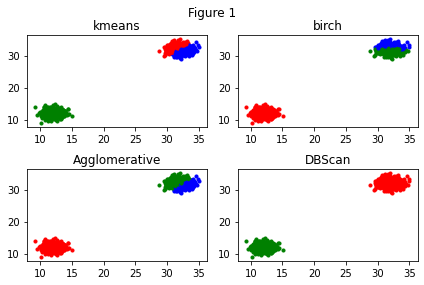

<Figure size 504x360 with 0 Axes>

In [147]:
df1 = gen_data_one()
create_graph(df1, "Figure 1")

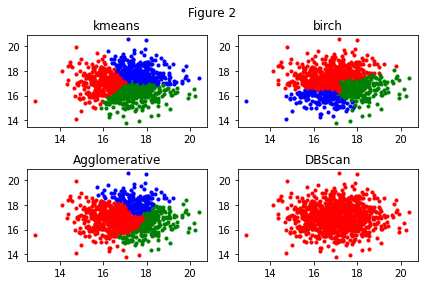

<Figure size 504x360 with 0 Axes>

In [148]:
df2 = gen_data_two()
create_graph(df2, "Figure 2")

### K-means
K- Means starts by clustering the data into n amount of clusters. A random n centroids are selected
and then the data is parsed through and each point is then assigned to the cluster in which the centroid it
is closest to. The mean of the n clusters is then calculated and theses are assigned as the new centroids.
The algrorithm then repeats this processes until the centroids stabalize.

The reason that we have outliers in figure the dispersion occurs because the

### Birch
https://www.geeksforgeeks.org/ml-birch-clustering/
Birch starts by building a Clustering Feature Tree. Theses features branches are then broken down into
smaller CF tree's. These smaller trees are then Clustered together for the desired amount of clusters.

A CF tree is a tree where each leaf node contains a sub-cluster. Every entry in a CF tree contains a pointer to a
child node and a CF entry made up of the sum of CF entries in the child nodes. There is a maximum number of entries
in each leaf node. This maximum number is called the threshold

In figure 1 for the birch algorithm the decision tree breaks the data into
-It tries to minimize the distance between any of the points in the trees.
-It's going to try to group everything to the closest point
-Uses linear sum and the quadratic sums minimize
-Average distance from the centroid to any point in the cluster
also the average distance between two points.
It tries to aoid those long cigar type shapes. Because then the distances get long
If it is in a nice ball the average distance get smaller.


The difference in figure one the birch algorithm looks more square because it is trying to minimize the
distance between all of the points from eachother. This makes the data look more square like than the K means.

### Agglomerative
https://www.geeksforgeeks.org/agglomerative-methods-in-machine-learning/
Starts with everything in their own cluster
- Any Pair Wise Distance
- Use's a bottom up approach
- 'Ward' linkage,
-Uses the bottom-up approach. It starts with each object forming its own cluster
- then iteratively merges the clusters according to their similarity to form large cluster

-In Figure 1. The Red Cluster starts to have a larger variance as it joins clusters together
This then increases its variance an and add a larger set of data. Where as the two smaller clusters
In Green and Blue pull a tighter spread together.

-Agglomerative uses a similiar to the k-means in the way in which the algorithm works
which is why they look the same.

### dbscan
https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/
Assumes the data is spherical. It will calculate sep
Differences between nearest points
-Is based on the intuitive notion of "clusters" and noise. The key idea is that for
each point of a cluster, the neighborhood of a given radius has to contain atleast a minumum
number of points
-DB scan helps create clusters that have arbitrary shapes that might not be spheres.
-DB scan works well when the data may have some noise

-DBSCAN requires two parameters:
1). EPS It defines the neighborhood around a data point. If the distances between two points is lower
or equal to the eps then they are considered as neighbors. If the eps value chosen is too small
then large part of the data will be considered outlires.
If the EPS is large then the clusters will merge together.
EPS k-distrance Graph


2). MinPts. Minimum number of neighbors (data points) within eps radius.
The larger the data set the larger the minpoints must be chosen.
The min points is the amount of dimensions +1

Minpoints must be three